# Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from IPython.core.display  import HTML
from IPython.display       import Image
from geopy.distance import great_circle
from matplotlib.ticker import PercentFormatter
from folium.plugins import MarkerCluster

In [2]:
# Functions
def personal_settings():
     # plotly settings
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.rcParams['font.size'] = 24
        
    # notebook settings
    display(HTML('<style>.container{width:90% !important;}</style>'))
    np.set_printoptions(suppress=True)
    pd.set_option('display.float_format', '{:.2f}'.format)

    # seaborn settings
    sns.set(rc={'figure.figsize':(15,10)})
    sns.set_theme(style = 'darkgrid', font_scale = 1.5)
    return None

In [3]:
personal_settings()

In [4]:
# Loading Data

data = pd.read_csv('kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.00,0,0,...,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.00,0,0,...,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.00,0,0,...,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.00,0,0,...,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


# Eploratory Analysis 

In [5]:
#check types of variable
data.dtypes

id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
#check dataset size
print('Number of rows: {}'.format(data.shape[0]))
print('Number of columns: {}'.format(data.shape[1]))

Number of rows: 21613
Number of columns: 21


In [7]:
#check null values
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
#check NaN values
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
#check duplicates
data[data.duplicated(['id'],keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,20140725T000000,430000,3,1.50,1580,5000,1.00,0,0,...,8,1290,290,1939,0,98117,47.69,-122.39,1570,4500
94,6021501535,20141223T000000,700000,3,1.50,1580,5000,1.00,0,0,...,8,1290,290,1939,0,98117,47.69,-122.39,1570,4500
313,4139480200,20140618T000000,1384000,4,3.25,4290,12103,1.00,0,3,...,11,2690,1600,1997,0,98006,47.55,-122.10,3860,11244
314,4139480200,20141209T000000,1400000,4,3.25,4290,12103,1.00,0,3,...,11,2690,1600,1997,0,98006,47.55,-122.10,3860,11244
324,7520000520,20140905T000000,232000,2,1.00,1240,12092,1.00,0,0,...,6,960,280,1922,1984,98146,47.50,-122.35,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,20150330T000000,502000,4,2.50,2680,5539,2.00,0,0,...,8,2680,0,2013,0,98045,47.48,-121.73,2680,5992
20779,6300000226,20140626T000000,240000,4,1.00,1200,2171,1.50,0,0,...,7,1200,0,1933,0,98133,47.71,-122.34,1130,1598
20780,6300000226,20150504T000000,380000,4,1.00,1200,2171,1.50,0,0,...,7,1200,0,1933,0,98133,47.71,-122.34,1130,1598
21580,7853420110,20141003T000000,594866,3,3.00,2780,6000,2.00,0,0,...,9,2780,0,2013,0,98065,47.52,-121.89,2850,6000


In [10]:
#separate numerical attributes
df_attributes = data.select_dtypes(include = ['int64', 'float64'])
#check numerical attributes statistical behaviour
avg = pd.DataFrame(df_attributes.apply(np.mean))
median = pd.DataFrame(df_attributes.apply(np.median))
max_= pd.DataFrame(df_attributes.apply(np.max))
min_= pd.DataFrame(df_attributes.apply(np.min))
std = pd.DataFrame(df_attributes.apply(np.std))

df_stats = pd.concat([avg, median, max_, min_, std], axis = 1).reset_index()
df_stats.columns = ['attributes','mean', 'median', 'max_value', 'min_value', 'std']
df_stats

,attributes,mean,median,max_value,min_value,std
0,id,4580301520.86,3904930410.00,9900000190.00,1000102.00,2876499023.43
1,price,540088.14,450000.00,7700000.00,75000.00,367118.70
2,bedrooms,3.37,3.00,33.00,0.00,0.93
3,bathrooms,2.11,2.25,8.00,0.00,0.77
4,sqft_living,2079.90,1910.00,13540.00,290.00,918.42
5,sqft_lot,15106.97,7618.00,1651359.00,520.00,41419.55
6,floors,1.49,1.50,3.50,1.00,0.54
7,waterfront,0.01,0.00,1.00,0.00,0.09
8,view,0.23,0.00,4.00,0.00,0.77
9,condition,3.41,3.00,5.00,1.00,0.65


In [11]:
#From df_stats, noticed large diffence (possible error)
print(data.groupby(['bedrooms']).size())

bedrooms
0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
dtype: int64


In [12]:
#check mean living area per number of bedrooms
print(data[['sqft_living', 'bedrooms']].groupby(['bedrooms']).mean().reset_index().sort_values(by = 'sqft_living'))
#houses listed with 33 and 11 rooms considered to be typing error. houses with 0 bedrooms considered to be not attractive. Drop those.

    bedrooms  sqft_living
1          1       884.61
2          2      1239.75
12        33      1620.00
0          0      1707.85
3          3      1805.84
4          4      2554.65
11        11      3000.00
5          5      3047.55
6          6      3284.34
10        10      3706.67
9          9      3775.00
8          8      3800.00
7          7      3974.21


# Transform Data 

In [13]:
#trasform column 'date' to date format
data['date'] = pd.to_datetime(data['date'])
data.dtypes

id                        int64
date             datetime64[ns]
price                     int64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [14]:
#Remove duplicates based on 'id'
data.drop_duplicates(subset="id", keep='last', inplace=True)
print('Number of rows after remove duplicates: {}'.format(data.shape[0]))

Number of rows after remove duplicates: 21436


In [15]:
#Remove outliers
data = data[(data['bedrooms'] != 0) & (data['bedrooms'] != 11) & (data['bedrooms'] != 33)]
print(data.groupby(['bedrooms']).size())

bedrooms
1      194
2     2736
3     9731
4     6849
5     1586
6      265
7       38
8       13
9        6
10       3
dtype: int64


In [16]:
#check data after data cleaning
df_attributes = data.select_dtypes(include = ['int64', 'float64'])
#check numerical attributes statistical behaviour
avg = pd.DataFrame(df_attributes.apply(np.mean))
median = pd.DataFrame(df_attributes.apply(np.median))
max_= pd.DataFrame(df_attributes.apply(np.max))
min_= pd.DataFrame(df_attributes.apply(np.min))
std = pd.DataFrame(df_attributes.apply(np.std))

df_stats = pd.concat([avg, median, max_, min_, std], axis = 1).reset_index()
df_stats.columns = ['attributes','mean', 'median', 'max_value', 'min_value', 'std']
df_stats

,attributes,mean,median,max_value,min_value,std
0,id,4580966503.68,3904921250.00,9900000190.00,1000102.00,2876701014.41
1,price,541726.58,450500.00,7700000.00,75000.00,367321.78
2,bedrooms,3.37,3.00,10.00,1.00,0.90
3,bathrooms,2.12,2.25,8.00,0.00,0.77
4,sqft_living,2082.91,1920.00,13540.00,370.00,918.89
5,sqft_lot,15131.07,7615.00,1651359.00,520.00,41529.29
6,floors,1.50,1.50,3.50,1.00,0.54
7,waterfront,0.01,0.00,1.00,0.00,0.09
8,view,0.24,0.00,4.00,0.00,0.77
9,condition,3.41,3.00,5.00,1.00,0.65


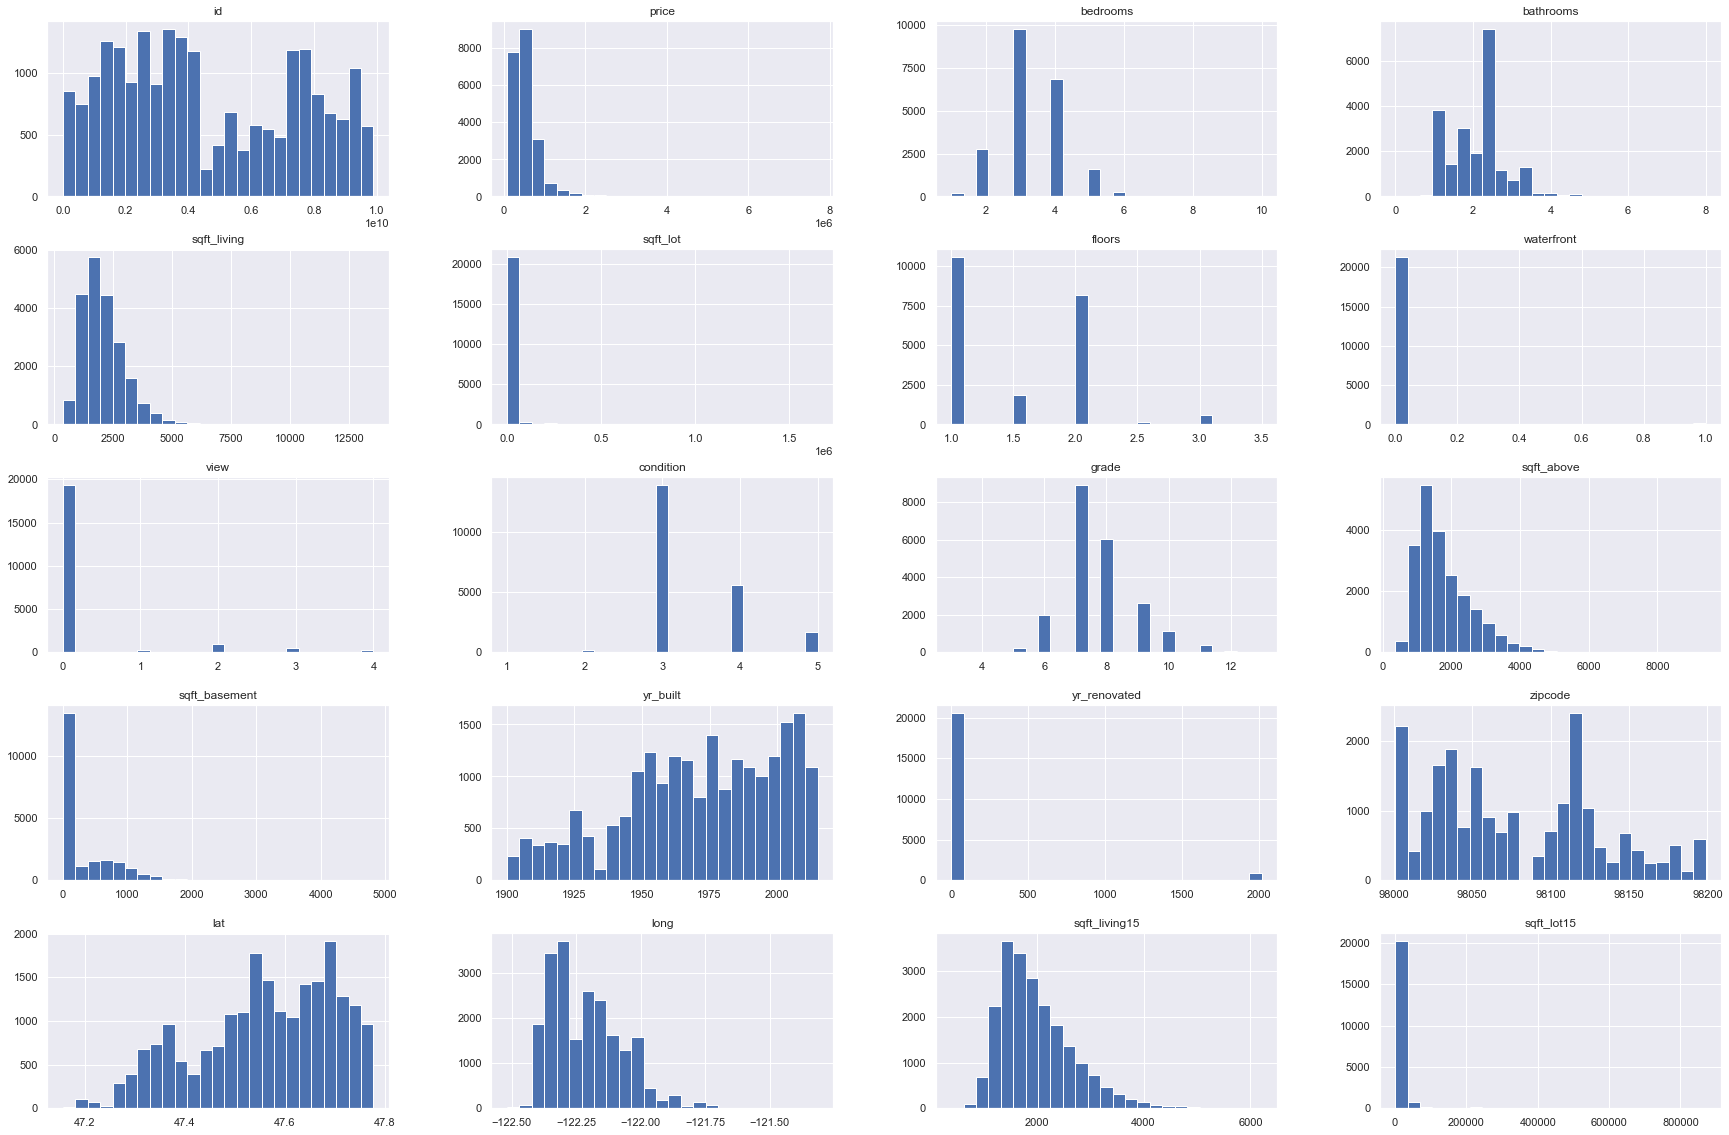

In [17]:
sns.set(rc={'figure.figsize':(30,20)})
df_attributes.hist(bins=25);
personal_settings()

# Adding new features

In [18]:
#Adding column with median_price per zipcode
decision_df = data[['id', 'zipcode', 'date', 'condition', 'grade', 'price']].copy()
zc_median_price = decision_df[['price', 'zipcode']].groupby('zipcode').median().reset_index()
decision_df = pd.merge(decision_df, zc_median_price, on = 'zipcode', how = 'inner').rename(columns = {'price_x':'buying_price', 'price_y': 'median_price'})
decision_df['buying_price'] = decision_df['buying_price'].astype('float64')
decision_df

,id,zipcode,date,condition,grade,buying_price,median_price
0,7129300520,98178,2014-10-13,3,7,221900.00,279500.00
1,4060000240,98178,2014-06-23,4,6,205425.00,279500.00
2,4058801670,98178,2014-07-17,3,8,445000.00,279500.00
3,2976800796,98178,2014-09-25,3,7,236000.00,279500.00
4,6874200960,98178,2015-02-27,3,6,170000.00,279500.00
...,...,...,...,...,...,...,...
21416,2525049086,98039,2014-10-03,4,11,2720000.00,1905000.00
21417,2525049113,98039,2014-07-25,4,10,1950000.00,1905000.00
21418,3262300485,98039,2015-04-21,3,11,2250000.00,1905000.00
21419,6447300365,98039,2014-11-13,3,11,2900000.00,1905000.00


In [20]:
#Adding column with buy/no_buy recommendation
decision_df['recommendation'] = decision_df[['condition', 'buying_price', 'median_price']].apply(lambda x: 'buy' if (x['condition'] >= 3) & (x['buying_price'] < x['median_price']) else 'no_buy', axis = 1)
buy = decision_df[decision_df['recommendation'] == 'buy'].shape[0]
no_buy = decision_df.shape[0]-buy
print('We have {} houses recommended to buy and {} do not buy\n'.format(buy, no_buy))
decision_df

We have 10500 houses recommended to buy and 10921 do not buy



,id,zipcode,date,condition,grade,buying_price,median_price,recommendation
0,7129300520,98178,2014-10-13,3,7,221900.00,279500.00,buy
1,4060000240,98178,2014-06-23,4,6,205425.00,279500.00,buy
2,4058801670,98178,2014-07-17,3,8,445000.00,279500.00,no_buy
3,2976800796,98178,2014-09-25,3,7,236000.00,279500.00,buy
4,6874200960,98178,2015-02-27,3,6,170000.00,279500.00,buy
...,...,...,...,...,...,...,...,...
21416,2525049086,98039,2014-10-03,4,11,2720000.00,1905000.00,no_buy
21417,2525049113,98039,2014-07-25,4,10,1950000.00,1905000.00,no_buy
21418,3262300485,98039,2015-04-21,3,11,2250000.00,1905000.00,no_buy
21419,6447300365,98039,2014-11-13,3,11,2900000.00,1905000.00,no_buy


In [21]:
#Creating column season
season_df = decision_df[decision_df['recommendation'] == 'buy'].copy()
season_df['month'] = season_df['date'].dt.month
season_df['season'] = season_df['month'].apply(lambda x: 'spring' if (x >= 3) & (x < 6) else
                                                         'summer' if (x >= 6) & (x < 9) else
                                                         'fall'   if (x >= 9) & (x < 12) else
                                                         'winter')
season_df

,id,zipcode,date,condition,grade,buying_price,median_price,recommendation,month,season
0,7129300520,98178,2014-10-13,3,7,221900.00,279500.00,buy,10,fall
1,4060000240,98178,2014-06-23,4,6,205425.00,279500.00,buy,6,summer
3,2976800796,98178,2014-09-25,3,7,236000.00,279500.00,buy,9,fall
4,6874200960,98178,2015-02-27,3,6,170000.00,279500.00,buy,2,winter
5,4268200055,98178,2015-05-01,3,7,245000.00,279500.00,buy,5,spring
...,...,...,...,...,...,...,...,...,...,...
21408,3025300225,98039,2014-10-31,4,9,1450000.00,1905000.00,buy,10,fall
21409,2470200020,98039,2014-05-14,4,10,1880000.00,1905000.00,buy,5,spring
21411,3625049079,98039,2014-08-01,3,7,1350000.00,1905000.00,buy,8,summer
21413,5427100150,98039,2014-06-26,3,9,1410000.00,1905000.00,buy,6,summer


In [22]:
median_season_df = season_df[['buying_price', 'zipcode', 'season']].groupby(['season','zipcode']).median().sort_values(by = 'zipcode').reset_index()
median_season_df

,season,zipcode,buying_price
0,fall,98001,217500.00
1,summer,98001,213300.00
2,spring,98001,212750.00
3,winter,98001,228250.00
4,winter,98002,189000.00
...,...,...,...
275,fall,98198,219000.00
276,spring,98199,543115.00
277,fall,98199,511200.00
278,summer,98199,520000.00


In [23]:
#Create columns for median price of each season
median_season_df = median_season_df.pivot(index = 'zipcode', columns = 'season', values = 'buying_price').reset_index()
median_season_df

season,zipcode,fall,spring,summer,winter
0,98001,217500.00,212750.00,213300.00,228250.00
1,98002,195250.00,206000.00,207975.00,189000.00
2,98003,223500.00,242000.00,227000.00,228245.00
3,98004,823000.00,865000.00,815000.00,825000.00
4,98005,580000.00,633725.00,666250.00,635000.00
...,...,...,...,...,...
65,98177,432450.00,460000.00,420000.00,412250.00
66,98178,216500.00,229250.00,227000.00,222900.00
67,98188,240000.00,225000.00,231500.00,220000.00
68,98198,219000.00,210000.00,223000.00,220000.00


In [24]:
median_season_df.columns = ['zipcode', 'fall_median', 'spring_median', 'summer_median', 'winter_median']
median_season_df

,zipcode,fall_median,spring_median,summer_median,winter_median
0,98001,217500.00,212750.00,213300.00,228250.00
1,98002,195250.00,206000.00,207975.00,189000.00
2,98003,223500.00,242000.00,227000.00,228245.00
3,98004,823000.00,865000.00,815000.00,825000.00
4,98005,580000.00,633725.00,666250.00,635000.00
...,...,...,...,...,...
65,98177,432450.00,460000.00,420000.00,412250.00
66,98178,216500.00,229250.00,227000.00,222900.00
67,98188,240000.00,225000.00,231500.00,220000.00
68,98198,219000.00,210000.00,223000.00,220000.00


In [25]:
#merging and filtering relevant data to suggest price for sale
dataset = pd.merge(season_df, median_season_df, on = 'zipcode', how = 'inner')
dataset = dataset[['id', 'date', 'zipcode', 'buying_price', 'median_price', 'season', 'fall_median', 'spring_median', 'summer_median', 'winter_median']].copy()
dataset

,id,date,zipcode,buying_price,median_price,season,fall_median,spring_median,summer_median,winter_median
0,7129300520,2014-10-13,98178,221900.00,279500.00,fall,216500.00,229250.00,227000.00,222900.00
1,4060000240,2014-06-23,98178,205425.00,279500.00,summer,216500.00,229250.00,227000.00,222900.00
2,2976800796,2014-09-25,98178,236000.00,279500.00,fall,216500.00,229250.00,227000.00,222900.00
3,6874200960,2015-02-27,98178,170000.00,279500.00,winter,216500.00,229250.00,227000.00,222900.00
4,4268200055,2015-05-01,98178,245000.00,279500.00,spring,216500.00,229250.00,227000.00,222900.00
...,...,...,...,...,...,...,...,...,...,...
10495,3025300225,2014-10-31,98039,1450000.00,1905000.00,fall,1450000.00,1620000.00,1335000.00,1402500.00
10496,2470200020,2014-05-14,98039,1880000.00,1905000.00,spring,1450000.00,1620000.00,1335000.00,1402500.00
10497,3625049079,2014-08-01,98039,1350000.00,1905000.00,summer,1450000.00,1620000.00,1335000.00,1402500.00
10498,5427100150,2014-06-26,98039,1410000.00,1905000.00,summer,1450000.00,1620000.00,1335000.00,1402500.00


In [26]:
# add column with suggest sale price
dataset['fall_selling_price'] = dataset[['buying_price', 'fall_median']].apply(lambda x: x['buying_price']*1.3 if x['buying_price'] <= x['fall_median'] else
                                                                                         x['buying_price']*1.1, axis=1)
dataset['spring_selling_price'] = dataset[['buying_price', 'spring_median']].apply(lambda x: x['buying_price']*1.3 if x['buying_price'] <= x['spring_median'] else
                                                                                         x['buying_price']*1.1, axis=1)
dataset['summer_selling_price'] = dataset[['buying_price', 'summer_median']].apply(lambda x: x['buying_price']*1.3 if x['buying_price'] <= x['summer_median'] else
                                                                                         x['buying_price']*1.1, axis=1)
dataset['winter_selling_price'] = dataset[['buying_price', 'winter_median']].apply(lambda x: x['buying_price']*1.3 if x['buying_price'] <= x['winter_median'] else
                                                                                         x['buying_price']*1.1, axis=1)
dataset

,id,date,zipcode,buying_price,median_price,season,fall_median,spring_median,summer_median,winter_median,fall_selling_price,spring_selling_price,summer_selling_price,winter_selling_price
0,7129300520,2014-10-13,98178,221900.00,279500.00,fall,216500.00,229250.00,227000.00,222900.00,244090.00,288470.00,288470.00,288470.00
1,4060000240,2014-06-23,98178,205425.00,279500.00,summer,216500.00,229250.00,227000.00,222900.00,267052.50,267052.50,267052.50,267052.50
2,2976800796,2014-09-25,98178,236000.00,279500.00,fall,216500.00,229250.00,227000.00,222900.00,259600.00,259600.00,259600.00,259600.00
3,6874200960,2015-02-27,98178,170000.00,279500.00,winter,216500.00,229250.00,227000.00,222900.00,221000.00,221000.00,221000.00,221000.00
4,4268200055,2015-05-01,98178,245000.00,279500.00,spring,216500.00,229250.00,227000.00,222900.00,269500.00,269500.00,269500.00,269500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,3025300225,2014-10-31,98039,1450000.00,1905000.00,fall,1450000.00,1620000.00,1335000.00,1402500.00,1885000.00,1885000.00,1595000.00,1595000.00
10496,2470200020,2014-05-14,98039,1880000.00,1905000.00,spring,1450000.00,1620000.00,1335000.00,1402500.00,2068000.00,2068000.00,2068000.00,2068000.00
10497,3625049079,2014-08-01,98039,1350000.00,1905000.00,summer,1450000.00,1620000.00,1335000.00,1402500.00,1755000.00,1755000.00,1485000.00,1755000.00
10498,5427100150,2014-06-26,98039,1410000.00,1905000.00,summer,1450000.00,1620000.00,1335000.00,1402500.00,1833000.00,1833000.00,1551000.00,1551000.00


In [27]:
#Add columns with min and max selling_price
dataset['min_selling_price'] = dataset[['fall_selling_price', 'spring_selling_price', 'summer_selling_price', 'winter_selling_price']].min(axis = 1)
dataset['max_selling_price'] = dataset[['fall_selling_price', 'spring_selling_price', 'summer_selling_price', 'winter_selling_price']].max(axis = 1)
dataset

,id,date,zipcode,buying_price,median_price,season,fall_median,spring_median,summer_median,winter_median,fall_selling_price,spring_selling_price,summer_selling_price,winter_selling_price,min_selling_price,max_selling_price
0,7129300520,2014-10-13,98178,221900.00,279500.00,fall,216500.00,229250.00,227000.00,222900.00,244090.00,288470.00,288470.00,288470.00,244090.00,288470.00
1,4060000240,2014-06-23,98178,205425.00,279500.00,summer,216500.00,229250.00,227000.00,222900.00,267052.50,267052.50,267052.50,267052.50,267052.50,267052.50
2,2976800796,2014-09-25,98178,236000.00,279500.00,fall,216500.00,229250.00,227000.00,222900.00,259600.00,259600.00,259600.00,259600.00,259600.00,259600.00
3,6874200960,2015-02-27,98178,170000.00,279500.00,winter,216500.00,229250.00,227000.00,222900.00,221000.00,221000.00,221000.00,221000.00,221000.00,221000.00
4,4268200055,2015-05-01,98178,245000.00,279500.00,spring,216500.00,229250.00,227000.00,222900.00,269500.00,269500.00,269500.00,269500.00,269500.00,269500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,3025300225,2014-10-31,98039,1450000.00,1905000.00,fall,1450000.00,1620000.00,1335000.00,1402500.00,1885000.00,1885000.00,1595000.00,1595000.00,1595000.00,1885000.00
10496,2470200020,2014-05-14,98039,1880000.00,1905000.00,spring,1450000.00,1620000.00,1335000.00,1402500.00,2068000.00,2068000.00,2068000.00,2068000.00,2068000.00,2068000.00
10497,3625049079,2014-08-01,98039,1350000.00,1905000.00,summer,1450000.00,1620000.00,1335000.00,1402500.00,1755000.00,1755000.00,1485000.00,1755000.00,1485000.00,1755000.00
10498,5427100150,2014-06-26,98039,1410000.00,1905000.00,summer,1450000.00,1620000.00,1335000.00,1402500.00,1833000.00,1833000.00,1551000.00,1551000.00,1551000.00,1833000.00


In [28]:
#Creating column with recommended season for selling (make sure to cover all possibilities)
dataset['sell_at'] = dataset[['fall_selling_price', 'spring_selling_price', 'summer_selling_price', 'winter_selling_price', 'max_selling_price']].apply(lambda x: 
                                                                                                                                                                'fall' if (x['max_selling_price'] == x['fall_selling_price']) & (x['max_selling_price'] != x['spring_selling_price']) & (x['max_selling_price'] != x['summer_selling_price']) & (x['max_selling_price'] != x['winter_selling_price']) else
                                                                                                                                                                'summer' if (x['max_selling_price'] == x['summer_selling_price']) & (x['max_selling_price'] != x['spring_selling_price']) & (x['max_selling_price'] != x['fall_selling_price']) & (x['max_selling_price'] != x['winter_selling_price']) else
                                                                                                                                                                'spring' if (x['max_selling_price'] == x['spring_selling_price']) & (x['max_selling_price'] != x['fall_selling_price']) & (x['max_selling_price'] != x['summer_selling_price']) & (x['max_selling_price'] != x['winter_selling_price']) else
                                                                                                                                                                'winter' if (x['max_selling_price'] == x['winter_selling_price']) & (x['max_selling_price'] != x['spring_selling_price']) & (x['max_selling_price'] != x['summer_selling_price']) & (x['max_selling_price'] != x['fall_selling_price']) else
                                                                                                                                                                'fall_or_summer' if (x['max_selling_price'] == x['fall_selling_price']) & (x['max_selling_price'] == x['summer_selling_price']) & (x['max_selling_price'] != x['winter_selling_price']) & (x['max_selling_price'] != x['spring_selling_price']) else
                                                                                                                                                                'fall_or_spring' if (x['max_selling_price'] == x['fall_selling_price']) & (x['max_selling_price'] == x['spring_selling_price']) & (x['max_selling_price'] != x['winter_selling_price']) & (x['max_selling_price'] != x['summer_selling_price']) else
                                                                                                                                                                'fall_or_winter' if (x['max_selling_price'] == x['fall_selling_price']) & (x['max_selling_price'] == x['winter_selling_price']) & (x['max_selling_price'] != x['spring_selling_price']) & (x['max_selling_price'] != x['summer_selling_price']) else
                                                                                                                                                                'summer_or_spring' if (x['max_selling_price'] == x['summer_selling_price']) & (x['max_selling_price'] == x['spring_selling_price']) & (x['max_selling_price'] != x['fall_selling_price']) & (x['max_selling_price'] != x['winter_selling_price']) else
                                                                                                                                                                'summer_or_winter' if (x['max_selling_price'] == x['summer_selling_price']) & (x['max_selling_price'] == x['winter_selling_price']) & (x['max_selling_price'] != x['fall_selling_price']) & (x['max_selling_price'] != x['spring_selling_price']) else
                                                                                                                                                                'spring_or_winter' if (x['max_selling_price'] == x['spring_selling_price']) & (x['max_selling_price'] == x['winter_selling_price']) & (x['max_selling_price'] != x['fall_selling_price']) & (x['max_selling_price'] != x['summer_selling_price']) else
                                                                                                                                                                'fall_or_summer_or_spring' if (x['max_selling_price'] == x['fall_selling_price']) & (x['max_selling_price'] == x['summer_selling_price']) & (x['max_selling_price'] == x['spring_selling_price']) & (x['max_selling_price'] != x['winter_selling_price']) else
                                                                                                                                                                'fall_or_summer_or_winter' if (x['max_selling_price'] == x['fall_selling_price']) & (x['max_selling_price'] == x['summer_selling_price']) & (x['max_selling_price'] == x['winter_selling_price']) & (x['max_selling_price'] != x['spring_selling_price']) else
                                                                                                                                                                'fall_or_spring_or_winter' if (x['max_selling_price'] == x['fall_selling_price']) & (x['max_selling_price'] == x['spring_selling_price']) & (x['max_selling_price'] == x['winter_selling_price']) & (x['max_selling_price'] != x['summer_selling_price']) else
                                                                                                                                                                'summer_or_spring_or_winter' if (x['max_selling_price'] == x['summer_selling_price']) & (x['max_selling_price'] == x['spring_selling_price']) & (x['max_selling_price'] == x['winter_selling_price']) & (x['max_selling_price'] != x['fall_selling_price']) else
                                                                                                                                                                'any_season', 
                                                                                                                                                                 axis = 1)
dataset

,id,date,zipcode,buying_price,median_price,season,fall_median,spring_median,summer_median,winter_median,fall_selling_price,spring_selling_price,summer_selling_price,winter_selling_price,min_selling_price,max_selling_price,sell_at
0,7129300520,2014-10-13,98178,221900.00,279500.00,fall,216500.00,229250.00,227000.00,222900.00,244090.00,288470.00,288470.00,288470.00,244090.00,288470.00,summer_or_spring_or_winter
1,4060000240,2014-06-23,98178,205425.00,279500.00,summer,216500.00,229250.00,227000.00,222900.00,267052.50,267052.50,267052.50,267052.50,267052.50,267052.50,any_season
2,2976800796,2014-09-25,98178,236000.00,279500.00,fall,216500.00,229250.00,227000.00,222900.00,259600.00,259600.00,259600.00,259600.00,259600.00,259600.00,any_season
3,6874200960,2015-02-27,98178,170000.00,279500.00,winter,216500.00,229250.00,227000.00,222900.00,221000.00,221000.00,221000.00,221000.00,221000.00,221000.00,any_season
4,4268200055,2015-05-01,98178,245000.00,279500.00,spring,216500.00,229250.00,227000.00,222900.00,269500.00,269500.00,269500.00,269500.00,269500.00,269500.00,any_season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,3025300225,2014-10-31,98039,1450000.00,1905000.00,fall,1450000.00,1620000.00,1335000.00,1402500.00,1885000.00,1885000.00,1595000.00,1595000.00,1595000.00,1885000.00,fall_or_spring
10496,2470200020,2014-05-14,98039,1880000.00,1905000.00,spring,1450000.00,1620000.00,1335000.00,1402500.00,2068000.00,2068000.00,2068000.00,2068000.00,2068000.00,2068000.00,any_season
10497,3625049079,2014-08-01,98039,1350000.00,1905000.00,summer,1450000.00,1620000.00,1335000.00,1402500.00,1755000.00,1755000.00,1485000.00,1755000.00,1485000.00,1755000.00,fall_or_spring_or_winter
10498,5427100150,2014-06-26,98039,1410000.00,1905000.00,summer,1450000.00,1620000.00,1335000.00,1402500.00,1833000.00,1833000.00,1551000.00,1551000.00,1551000.00,1833000.00,fall_or_spring


In [29]:
# add column with expected profit
dataset['max_profit'] = dataset[['buying_price', 'max_selling_price']].apply(lambda x: x['max_selling_price'] - x['buying_price'], axis=1)
dataset['min_profit'] = dataset[['buying_price', 'min_selling_price']].apply(lambda x: x['min_selling_price'] - x['buying_price'], axis=1)
dataset

,id,date,zipcode,buying_price,median_price,season,fall_median,spring_median,summer_median,winter_median,fall_selling_price,spring_selling_price,summer_selling_price,winter_selling_price,min_selling_price,max_selling_price,sell_at,max_profit,min_profit
0,7129300520,2014-10-13,98178,221900.00,279500.00,fall,216500.00,229250.00,227000.00,222900.00,244090.00,288470.00,288470.00,288470.00,244090.00,288470.00,summer_or_spring_or_winter,66570.00,22190.00
1,4060000240,2014-06-23,98178,205425.00,279500.00,summer,216500.00,229250.00,227000.00,222900.00,267052.50,267052.50,267052.50,267052.50,267052.50,267052.50,any_season,61627.50,61627.50
2,2976800796,2014-09-25,98178,236000.00,279500.00,fall,216500.00,229250.00,227000.00,222900.00,259600.00,259600.00,259600.00,259600.00,259600.00,259600.00,any_season,23600.00,23600.00
3,6874200960,2015-02-27,98178,170000.00,279500.00,winter,216500.00,229250.00,227000.00,222900.00,221000.00,221000.00,221000.00,221000.00,221000.00,221000.00,any_season,51000.00,51000.00
4,4268200055,2015-05-01,98178,245000.00,279500.00,spring,216500.00,229250.00,227000.00,222900.00,269500.00,269500.00,269500.00,269500.00,269500.00,269500.00,any_season,24500.00,24500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,3025300225,2014-10-31,98039,1450000.00,1905000.00,fall,1450000.00,1620000.00,1335000.00,1402500.00,1885000.00,1885000.00,1595000.00,1595000.00,1595000.00,1885000.00,fall_or_spring,435000.00,145000.00
10496,2470200020,2014-05-14,98039,1880000.00,1905000.00,spring,1450000.00,1620000.00,1335000.00,1402500.00,2068000.00,2068000.00,2068000.00,2068000.00,2068000.00,2068000.00,any_season,188000.00,188000.00
10497,3625049079,2014-08-01,98039,1350000.00,1905000.00,summer,1450000.00,1620000.00,1335000.00,1402500.00,1755000.00,1755000.00,1485000.00,1755000.00,1485000.00,1755000.00,fall_or_spring_or_winter,405000.00,135000.00
10498,5427100150,2014-06-26,98039,1410000.00,1905000.00,summer,1450000.00,1620000.00,1335000.00,1402500.00,1833000.00,1833000.00,1551000.00,1551000.00,1551000.00,1833000.00,fall_or_spring,423000.00,141000.00


In [30]:
#summarizing data
summ_dataset = dataset[['id','zipcode', 'buying_price', 'median_price', 'min_selling_price', 'max_selling_price', 'min_profit', 'max_profit', 'sell_at']].copy()
summ_dataset

,id,zipcode,buying_price,median_price,min_selling_price,max_selling_price,min_profit,max_profit,sell_at
0,7129300520,98178,221900.00,279500.00,244090.00,288470.00,22190.00,66570.00,summer_or_spring_or_winter
1,4060000240,98178,205425.00,279500.00,267052.50,267052.50,61627.50,61627.50,any_season
2,2976800796,98178,236000.00,279500.00,259600.00,259600.00,23600.00,23600.00,any_season
3,6874200960,98178,170000.00,279500.00,221000.00,221000.00,51000.00,51000.00,any_season
4,4268200055,98178,245000.00,279500.00,269500.00,269500.00,24500.00,24500.00,any_season
...,...,...,...,...,...,...,...,...,...
10495,3025300225,98039,1450000.00,1905000.00,1595000.00,1885000.00,145000.00,435000.00,fall_or_spring
10496,2470200020,98039,1880000.00,1905000.00,2068000.00,2068000.00,188000.00,188000.00,any_season
10497,3625049079,98039,1350000.00,1905000.00,1485000.00,1755000.00,135000.00,405000.00,fall_or_spring_or_winter
10498,5427100150,98039,1410000.00,1905000.00,1551000.00,1833000.00,141000.00,423000.00,fall_or_spring


In [31]:
max_profit = summ_dataset['max_profit'].sum()
min_profit = summ_dataset['min_profit'].sum()
print('By following the buying recommendations, minimum profit expected is ${}. \n The maximun profit expected is ${}'.format(round(min_profit,2), round(max_profit,2)))

By following the buying recommendations, minimum profit expected is $694433672.2. 
 The maximun profit expected is $839540926.8


# Add distance from lake in order do make hipotesys (checked on marianaborgal project)

In [32]:
coordinates = data[['id', 'lat', 'long']].copy()
coordinates['query'] = coordinates[['lat', 'long']].apply(lambda x: str(x['lat']) + ',' + str(x['long']), axis = 1)
lake_tuple = 47.640883, -122.259250
coordinates['distance_lake'] = coordinates['query'].apply(lambda x: great_circle(lake_tuple, x).km)
coo_dataset = pd.merge(summ_dataset, coordinates, on = 'id', how = 'inner')
coo_dataset

,id,zipcode,buying_price,median_price,min_selling_price,max_selling_price,min_profit,max_profit,sell_at,lat,long,query,distance_lake
0,7129300520,98178,221900.00,279500.00,244090.00,288470.00,22190.00,66570.00,summer_or_spring_or_winter,47.51,-122.26,"47.5112,-122.257",14.42
1,4060000240,98178,205425.00,279500.00,267052.50,267052.50,61627.50,61627.50,any_season,47.50,-122.25,"47.5009,-122.248",15.59
2,2976800796,98178,236000.00,279500.00,259600.00,259600.00,23600.00,23600.00,any_season,47.51,-122.25,"47.5053,-122.255",15.08
3,6874200960,98178,170000.00,279500.00,221000.00,221000.00,51000.00,51000.00,any_season,47.50,-122.27,"47.5048,-122.272",15.16
4,4268200055,98178,245000.00,279500.00,269500.00,269500.00,24500.00,24500.00,any_season,47.49,-122.22,"47.4945,-122.22",16.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,3025300225,98039,1450000.00,1905000.00,1595000.00,1885000.00,145000.00,435000.00,fall_or_spring,47.62,-122.23,"47.6232,-122.235",2.68
10496,2470200020,98039,1880000.00,1905000.00,2068000.00,2068000.00,188000.00,188000.00,any_season,47.62,-122.24,"47.6245,-122.236",2.52
10497,3625049079,98039,1350000.00,1905000.00,1485000.00,1755000.00,135000.00,405000.00,fall_or_spring_or_winter,47.62,-122.24,"47.616,-122.239",3.16
10498,5427100150,98039,1410000.00,1905000.00,1551000.00,1833000.00,141000.00,423000.00,fall_or_spring,47.63,-122.23,"47.6334,-122.229",2.41


# Hypotesis

H1: Houses with water view are 30% more expensive, in average.

In [33]:
df1 = data[['price', 'waterfront']].groupby('waterfront').mean().reset_index().copy()
print(df1)
H1 = ((df1.iloc[1,1]-df1.iloc[0,1])/df1.iloc[0,1])*100
print('Houses with water view are {}% more expensive in average'.format(round(H1,2)))

   waterfront      price
0           0  533137.61
1           1 1661876.02
Houses with water view are 211.72% more expensive in average


H2: Houses built before 1955 are 50% cheaper

In [34]:
df2 = data.copy()
df2['construction'] = df2['yr_built'].apply(lambda x: 'Older than 1955' if x < 1955 else 'Newer then 1955')
df2 = df2[['price', 'construction']].groupby('construction').mean().reset_index()
print(df2)
H2 = abs((df2.iloc[0,1]-df2.iloc[1,1])/df2.iloc[1,1])*100
print('Houses built before 1955 are {}% cheaper'.format(round(H2,2)))

      construction     price
0  Newer then 1955 542331.02
1  Older than 1955 540204.27
Houses built before 1955 are 0.39% cheaper


H3: Houses without basement are 50% bigger then houses with basement

In [35]:
df3 = data.copy()
df3['has_basement'] = df3['sqft_basement'].apply(lambda x: 0 if x==0 else 1)
df3 = df3[['sqft_lot', 'has_basement']].groupby('has_basement').mean().reset_index()
H3 = abs((df3.iloc[0,1]-df3.iloc[1,1])/df3.iloc[0,1])*100
print('Houses without basement are {}% bigger'.format(round(H3,2)))

Houses without basement are 18.51% bigger


H4: The YoY price growth is 10%.

In [36]:
df4 = data.copy()
df4['year'] = df4['date'].dt.year
df4 = df4[['price', 'year']].groupby('year').mean().reset_index().sort_values(by='year')
df4['YoY_%'] = abs((df4['price'].diff(1))/df4['price']*100)
H4 = df4['YoY_%'].mean()
print('The average YoY price growth YoY is {}%'.format(round(H4,2)))

The average YoY price growth YoY is 0.2%


H5: Houses with 3 bathrooms have MoM price growth of 15%

In [37]:
df5 = data[(data['bathrooms'] == 3)][['id', 'bathrooms', 'date', 'price']].copy()
df5['date'] = pd.to_datetime(df5['date']).dt.strftime('%Y-%m')
df5 = df5[['price', 'date']].groupby('date').mean().reset_index()
df5['MoM_%'] = df5['price'].diff(1)/df5['price']*100
H5 = df5['MoM_%'].mean()
print('The average MoM price growth for 3 bathrooms houses is {}%'.format(round(H5,2)))

The average MoM price growth for 3 bathrooms houses is -0.33%


H6: Houses renovated are 15% more expesive

In [38]:
df6_r = data[(data['yr_renovated'] != 0)]['price'].mean()
df6_nr = data[(data['yr_renovated'] == 0)]['price'].mean()
H6 = abs((df6_r - df6_nr)/df6_nr)*100
print('Houses renovated are {}% more expensive'.format(round(H6,2)))

Houses renovated are 43.32% more expensive


H7: Average price grows 10% as grade grows

In [39]:
df7 = data[['grade', 'price']].groupby('grade').mean().reset_index()
df7['grade_%'] = df7['price'].diff(1)/df7['price']*100
H7 = df7['grade_%'].mean()
print('The average price grows {}% as grade grows'.format(round(H7,2)))

The average price grows 24.5% as grade grows


H8: From houses recommended to be bought, the ones with condition 5 are 20% more profitable that those with condition 3

In [40]:
df8 = data[['id', 'condition']].copy()
df8 = pd.merge(summ_dataset, df8, on = 'id', how = 'inner')
mean_5 = df8[df8['condition'] == 5]['max_profit'].mean()
mean_3 = df8[df8['condition'] == 3]['max_profit'].mean()
H8 = ((mean_5 - mean_3)/mean_3)*100
print('Houses with condition 5 are {}% less profitable than houses with condition 3'.format(round(H8,2)))

Houses with condition 5 are -7.27% less profitable than houses with condition 3


H9: Most properties (+50%) became available during summer/spring.

In [41]:
df9 = season_df[['id', 'season']].copy()
df9 = df9[['id', 'season']].groupby('season').count().reset_index()
H9 = (df9[(df9['season'] == 'spring') | (df9['season'] == 'summer')]['id'].sum())/df9['id'].sum()*100
print('{}% became available during summer or spring'.format(round(H9,2)))

57.79% became available during summer or spring


H10: Most houses to buy (+50%) are within a 15km radius from the lake

In [42]:
bin_groups = list(np.arange(0,90,15))
df10 = coo_dataset.copy()
df10['dist_fromlake_binned'] = pd.cut(df10['distance_lake'], bins=bin_groups)
df10_b = df10[['distance_lake', 'dist_fromlake_binned']].groupby('dist_fromlake_binned').count().reset_index()
df10_b['cumultive_%']=df10_b['distance_lake'].cumsum()/df10_b['distance_lake'].sum()*100
df10_b

,dist_fromlake_binned,distance_lake,cumultive_%
0,"(0, 15]",5230,49.81
1,"(15, 30]",3318,81.41
2,"(30, 45]",1817,98.71
3,"(45, 60]",121,99.87
4,"(60, 75]",14,100.00


# Plots and Maps

<AxesSubplot:xlabel='year', ylabel='price'>

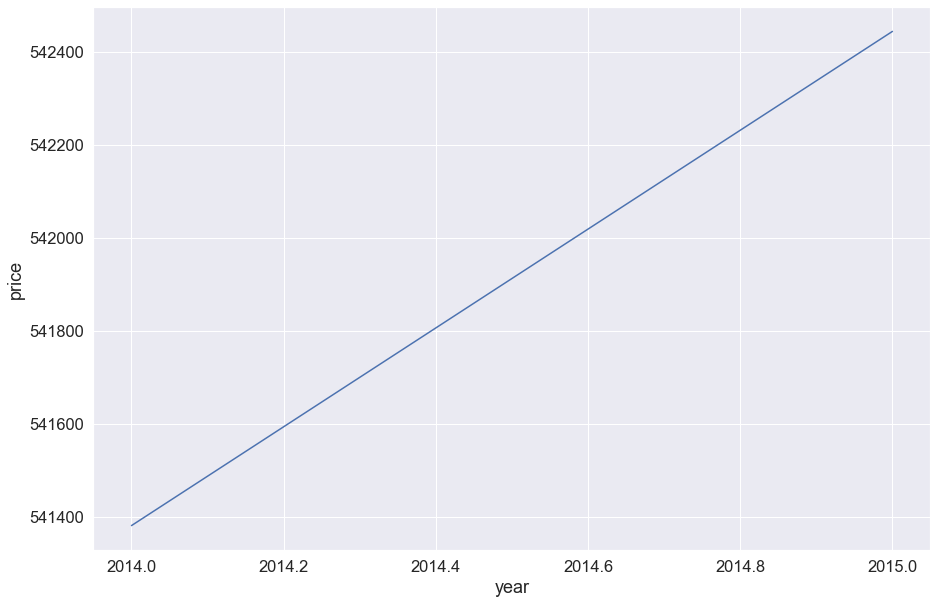

In [43]:
sns.lineplot(x = 'year', y = 'price', data = df4)

<AxesSubplot:xlabel='date', ylabel='MoM_%'>

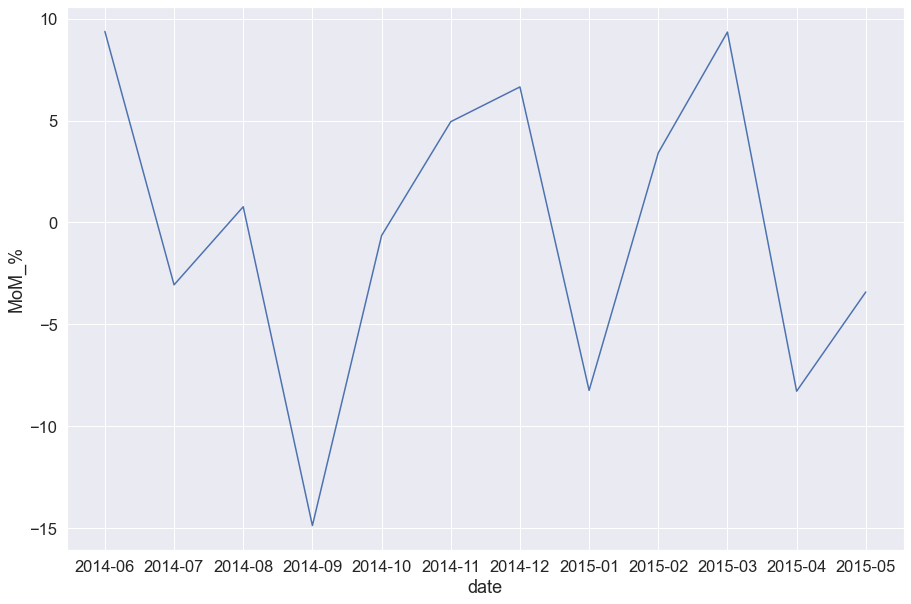

In [44]:
sns.lineplot(x = 'date', y = 'MoM_%', data = df5)

<AxesSubplot:xlabel='grade', ylabel='price'>

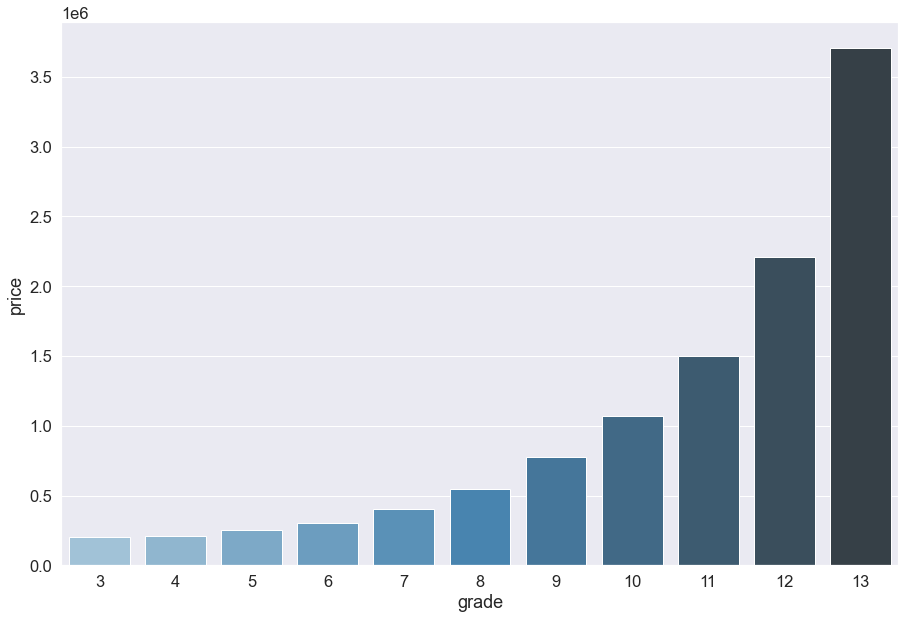

In [45]:
sns.barplot(x = 'grade', y = 'price', data = df7, palette="Blues_d")

<AxesSubplot:xlabel='condition', ylabel='max_profit'>

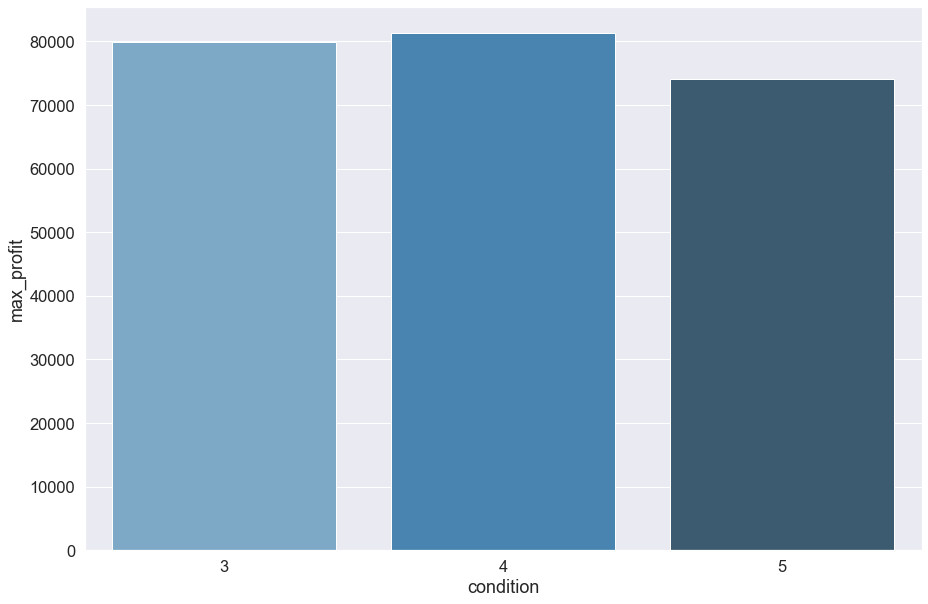

In [47]:
df8_g = df8[['condition', 'max_profit']].groupby('condition').mean().reset_index().sort_values(by = 'max_profit', ascending = False)
sns.barplot(x = 'condition', y = 'max_profit', data = df8_g, palette="Blues_d")

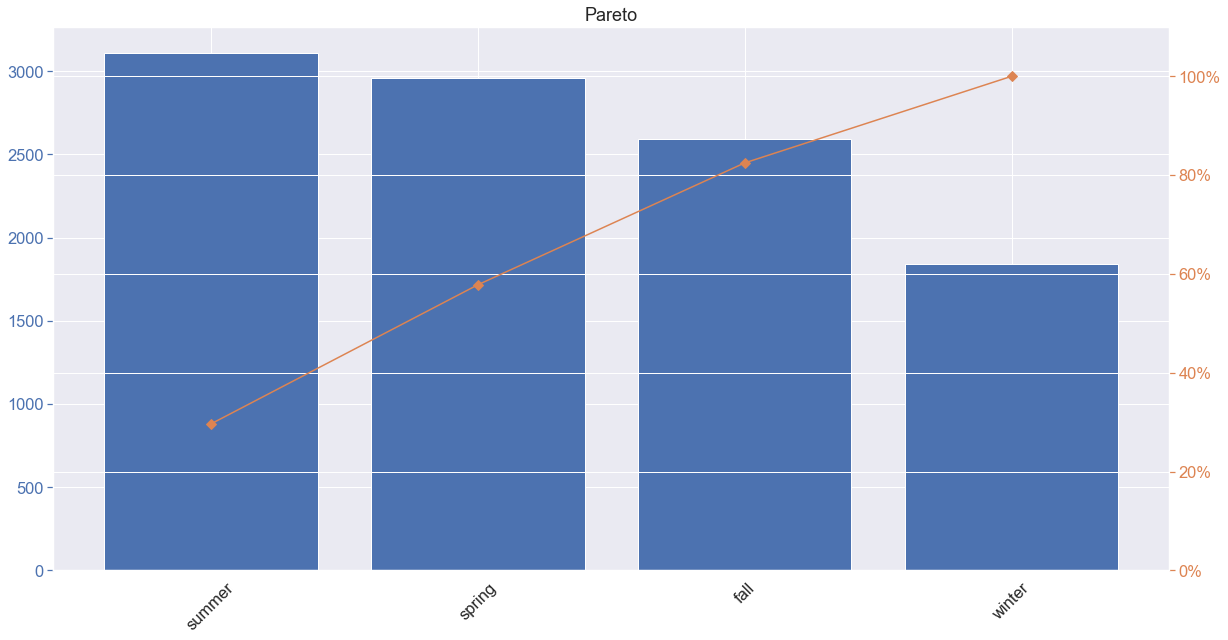

In [48]:
df9 = df9.sort_values(by='id',ascending=False)
df9['cumpercentage'] = df9['id'].cumsum()/df9['id'].sum()*100
# Cria o barplot e define os dados os eixos, a cor das barras, titulo do gráfico
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(df9['season'], df9['id'], color='C0')
ax.set_title('Pareto')
# Eixo secundário
ax2 = ax.twinx()
# Cria a Curva de Pareto no eixo secundário
ax2.plot(df9['season'], df9['cumpercentage'], color="C1", marker="D", ms=7, label='Pareto')
ax2.yaxis.set_major_formatter(PercentFormatter())
# Configurações dos eixos 
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
ax2.set_ylim([0,110])
# Ajusta a inclinação dos labels do eixo x
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

<AxesSubplot:xlabel='distance_lake', ylabel='Count'>

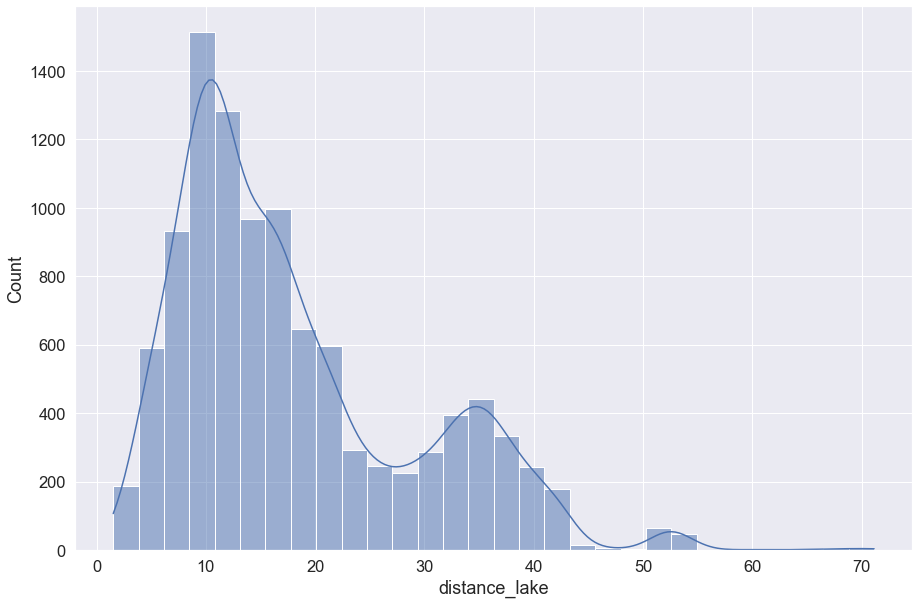

In [49]:
sns.histplot(data = df10, x="distance_lake", bins=30, kde = True)

# MAPS

In [50]:
#st.title('Region Overview')
#c3, c4 = st.columns((1, 1))
df = coo_dataset.sample(1000)

In [52]:
# density qty map
#c3.subheader('Portfolio Density')
density_map = folium.Map(location=[coo_dataset['lat'].mean(), coo_dataset['long'].mean()],
                         default_zoom_start=15)
marker_cluster = MarkerCluster().add_to(density_map)
for name, row in df.iterrows():
    folium.Marker(
        [row['lat'], 
        row['long']], 
        popup='House id: {0}. \n Buy for ${1} \n Sell for: ${2} \n Sall at {3}'.format(
            row['id'], 
            row['buying_price'], 
            row['max_selling_price'],
            row['sell_at']
            )
    ).add_to(marker_cluster)
    
density_map